**Random Forest for Clickbait Detection in ClickbaitTR**

---

In [0]:
!git clone -v https://github.com/ahmetax/kalbur.git 

In [0]:
import preprocessing as pr
import sys

pr.current_path = "/content/"

with open(pr.current_path + 'kalbur/kelime_bol.py', 'r') as file :
  filedata = file.read()

filedata = filedata.replace('veri/', pr.current_path + "kalbur/veri/")

with open(pr.current_path + 'kalbur/kelime_bol.py', 'w') as file:
  file.write(filedata)

sys.path.append(pr.current_path + "kalbur/")

import kelime_bol as kb

In [0]:
no_of_samples = 1000 # toy example

csv_files = {"limon":"dataset/limon_clickbait.csv",
             "evrensel":"dataset/evrensel_non-clickbait.csv",
             "spoiler":"dataset/spoiler_clickbait.csv",
             "diken":"dataset/diken_non-clickbait.csv"}

clickbait, non_clickbait = pr.return_data(csv_files)

special_characters = ["#", "?", "!", ".", "@"]

words_will_be_removed = ["işçi", "eylem", "meteoroloji", "katliam", 
                          "murat", "altı", "seçim", "diren", "dev", 
                          "gazze", "blog", "protesto", "beş", 
                          "yaşam", "manşet", "günaydın", "türkiye", 
                          "sınır","chp", "grev", "yaralı", "ateşkes", "yazı", "maden", "bayi"]

X_train, Y_train, X_test, Y_test, unique_word_list = pr.generatesample(clickbait[:no_of_samples], non_clickbait[:no_of_samples], 
                                                                   special_characters, words_will_be_removed, 
                                                                   isseparate=False, scaling=True)

# of tweets in limon: 21791
# of tweets in evrensel: 13093
# of tweets in spoiler: 1898
# of tweets in diken: 10936


In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def metrics(rf, X_train, Y_train, X_test, Y_test):
  cf = classification_report(Y_test, rf.predict(X_test))
  test_accuracy = accuracy_score(Y_test, rf.predict(X_test))
  training_accuracy = accuracy_score(Y_train, rf.predict(X_train))
  return cf, test_accuracy, training_accuracy

def rf_training(X_train, Y_train):
  rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=None, verbose=1)
  rf.fit(X_train, Y_train)
  return rf

In [0]:
rf = rf_training(X_train, Y_train)
cf, test_accuracy, training_accuracy = metrics(rf, X_train, Y_train, X_test, Y_test)
print(cf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

         0.0       0.79      0.91      0.85       184
         1.0       0.91      0.79      0.85       216

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.86      0.85      0.85       400



[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


Feature ranking:


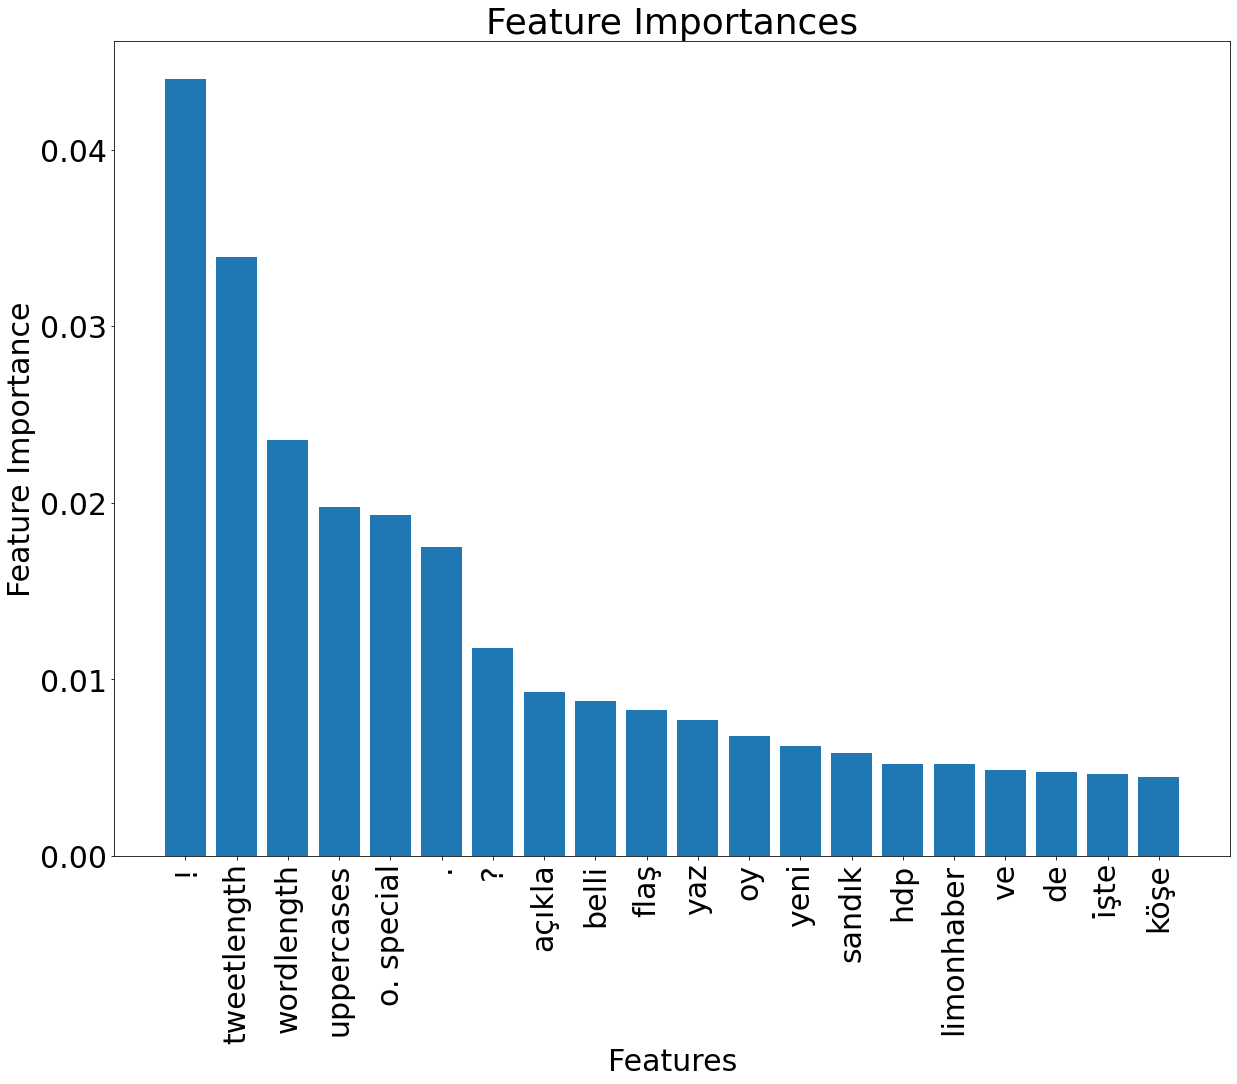

In [0]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import numpy as np
import matplotlib.pyplot as plt

WORD_SPACE_WITH_OTHER_FEATURES = np.array(unique_word_list + special_characters + ["o. special", "uppercases", "wordlength", "tweetlength"])
n_of_features_to_consider = 20

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

features_all = []
features_values = []
for f in range(n_of_features_to_consider):
  features_all.append(WORD_SPACE_WITH_OTHER_FEATURES.tolist()[indices[f]])
  features_values.append(importances[indices[f]])

# Plot the feature importances of the forest
plt.figure(figsize=(20, 15))
csfont = {'fontname':'Arial'}
plt.title("Feature Importances",**csfont)
plt.xlabel('Features', **csfont)
plt.ylabel('Feature Importance', **csfont)
plt.rcParams['font.size'] = 30
plt.bar(features_all, features_values)
plt.xticks(rotation=90)
plt.savefig('random_forest_graph.png', bbox_inches = 'tight')
plt.show()